In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import sklearn
sns.set()

In [10]:
df = pd.read_csv('..\..\dataset_for_machine_learning\HeartStudy.csv')

In [11]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [164]:
df.dropna(axis = 0, inplace = True)

In [165]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [166]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


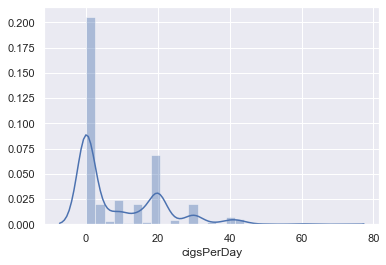

In [167]:
sns.distplot(df['cigsPerDay'])

In [168]:
##q = df['cigsPerDay'].quantile(0.99)
##df = df[df['cigsPerDay'] < q]

In [169]:
##sns.distplot(df['cigsPerDay'])

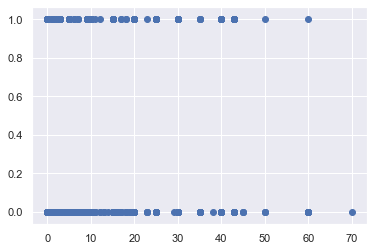

In [170]:
plt.scatter(df['cigsPerDay'], df['TenYearCHD'])

In [171]:
df.columns.values

array(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype=object)

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

variables = df[['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
X = add_constant(variables)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1]) ]
vif['features'] = X.columns
vif

,VIF,features
0,127.752134,const
1,1.315494,age
2,1.048542,cigsPerDay
3,1.106154,totChol
4,3.109630,sysBP
5,2.860657,diaBP
6,1.190182,BMI
7,1.062395,heartRate
8,1.038703,glucose


In [173]:
##from sklearn.linear_model import LogisticRegression

In [174]:
##y = df['TenYearCHD']
##x = df.drop(['TenYearCHD'], axis = 1)

In [175]:
##x1 = sm.add_constant(x)
##reg = sm.Logit(y,x)
##result = reg.fit()
##result.summary()

In [176]:
y = df['TenYearCHD']
x = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',]]

In [177]:
x1 = sm.add_constant(x)
reg = sm.Logit(y,x)
result = reg.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.396494
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3643
Method:                           MLE   Df Model:                           14
Date:                Tue, 07 Apr 2020   Pseudo R-squ.:                 0.07063
Time:                        03:00:00   Log-Likelihood:                -1450.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 3.572e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.4015      0.105      3.834      0.000       0.196       0.607
age                 0.0289      0.006      4.949      0.000       0.017       0.040
education          -0.1973      0.048     -4.100      0.000      -0.292      -0.103
currentSmoker      -0.2111      0.153     -1.380      0.168      -0.511       0.089
cigsPerDay          0.0206      0.006      3.326      0.001       0.008       0.033
BPMeds              0.3657      0.230      1.587      0.113      -0.086       0.817
prevalentStroke     0.7057      0.485      1.456      0.146      -0.245       1.656
prevalentHyp        0.9162      0.124      7.365      0.000       0.672       1.160
diabetes            0.7305      0.298      2.452      0.014       0.147       1.314
totChol            -0.0010      0.001     -0.925      0.355      -0.003       0.001
sysBP               0.0127      0.004      3.345      0.001       0.005       0.020
diaBP              -0.0259      0.006     -4.232      0.000      -0.038      -0.014
BMI                -0.0483      0.012     -3.928      0.000      -0.072      -0.024
heartRate          -0.0224      0.004     -5.647      0.000      -0.030      -0.015
glucose             0.0020      0.002      0.967      0.334      -0.002       0.006
===================================================================================
"""

In [185]:
new_features=df[['male', 'age', 'education', 'cigsPerDay','prevalentHyp', 'diabetes', 
       'sysBP', 'diaBP', 'BMI', 'heartRate','TenYearCHD']]
x=new_features.drop(['TenYearCHD'], axis = 1)
y=new_features['TenYearCHD']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 365)

In [186]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\ABOLARIN BUKOLA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [187]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8497267759562842

In [188]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [189]:
cm

array([[619,   2],
       [108,   3]], dtype=int64)

In [190]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.935735,0.064265
1,0.959764,0.040236
2,0.921418,0.078582
3,0.922694,0.077306
4,0.849989,0.150011


In [191]:
y_test

1440    0
1059    0
19      0
3216    0
968     0
       ..
1262    0
3981    0
3074    1
217     0
2505    1
Name: TenYearCHD, Length: 732, dtype: int64

In [192]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [193]:
confusion_matrix(x,y,logreg)

(array([[3085.,   16.],
        [ 529.,   28.]]), 0.8510114816839803)

In [ ]:
sklearn.metrics.accuracy_score(y_test,y_pred)